# Band structure and DOS for graphene

Ref:
    https://wiki.fysik.dtu.dk/ase/ase/dft/kpoints.html

In [1]:
import numpy as np
from qepy.calculator import QEpyCalculator
from qepy.io import QEInput

In [2]:
from ase.io.trajectory import Trajectory
from ase.lattice.hexagonal import Graphene
from ase import Atoms
import matplotlib.pyplot as plt

In [3]:
qe_options = {
    '&control': {
        'calculation': "'scf'",
        'prefix': "'tmp'",
        'pseudo_dir': "'./'"},
    '&system': {
        'ibrav' : 0,
        'ecutwfc': 20,
        'ecutrho': 200},
    '&electrons': {
        'conv_thr' : 1.0e-8},
     'atomic_species': ['C 12.0107 C.pbe-rrkjus.UPF'],
     'k_points automatic': [' 9 9 1 0 0 0'],
}

In [4]:
atoms = Atoms(Graphene('C', latticeconstant={'a':2.46, 'c': 7}))

In [5]:
calc = QEpyCalculator(qe_options=qe_options, logfile='tmp.out')
atoms.calc=calc

## Run a ground state calculation

In [6]:
energy = atoms.get_potential_energy()
efermi = calc.get_fermi_level()
print(efermi)

1.2285572037575259


## DOS with a fine K-points

In [7]:
qe_options['k_points automatic']= ['12 12 1 0 0 0']
energies, dos =  atoms.calc.get_dos(qe_options, width=0.6)

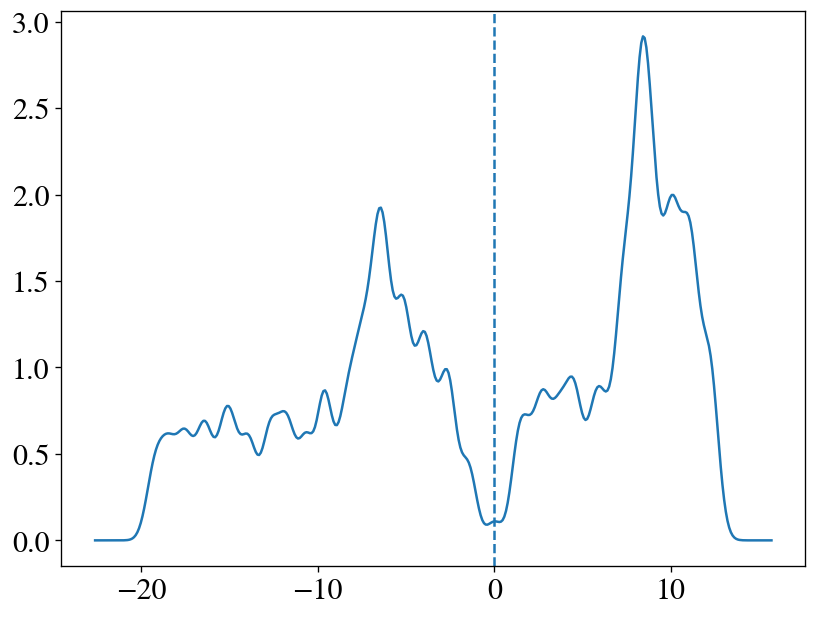

In [8]:
plt.plot(energies, dos)
plt.axvline(x=0, ls='--')

## Band structure with ASE bandpath

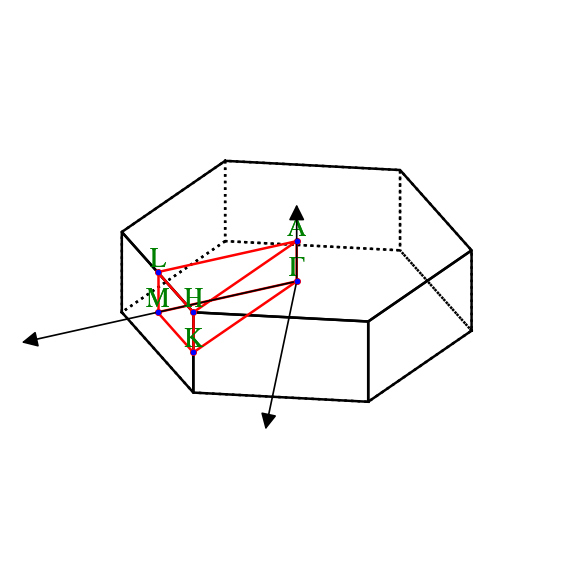

HEX(a=2.46, c=7)
  Variant name: HEX
  Special point names: GMKALH
  Default path: GMKGALHA,LM,KH

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    M   0.5000  0.0000  0.0000
    K   0.3333  0.3333  0.0000
    A   0.0000  0.0000  0.5000
    L   0.5000  0.0000  0.5000
    H   0.3333  0.3333  0.5000



In [9]:
lat = atoms.cell.get_bravais_lattice()
lat.plot_bz(show=True)
print(lat.description())

In [10]:
path = atoms.cell.bandpath('GKMG',npoints=61)

In [11]:
qe_options['&system']['nbnd']=6
band = atoms.calc.get_band_structure(qe_options, kpts=path, reference=efermi)

(-16.0, 8.0)

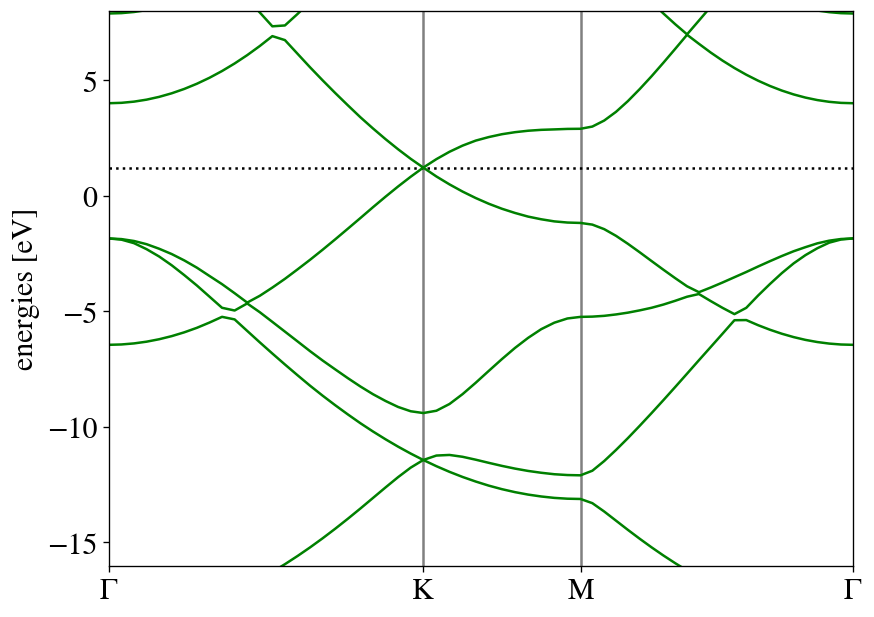

In [12]:
bp=band.plot()
bp.set_ylim(-16,8)

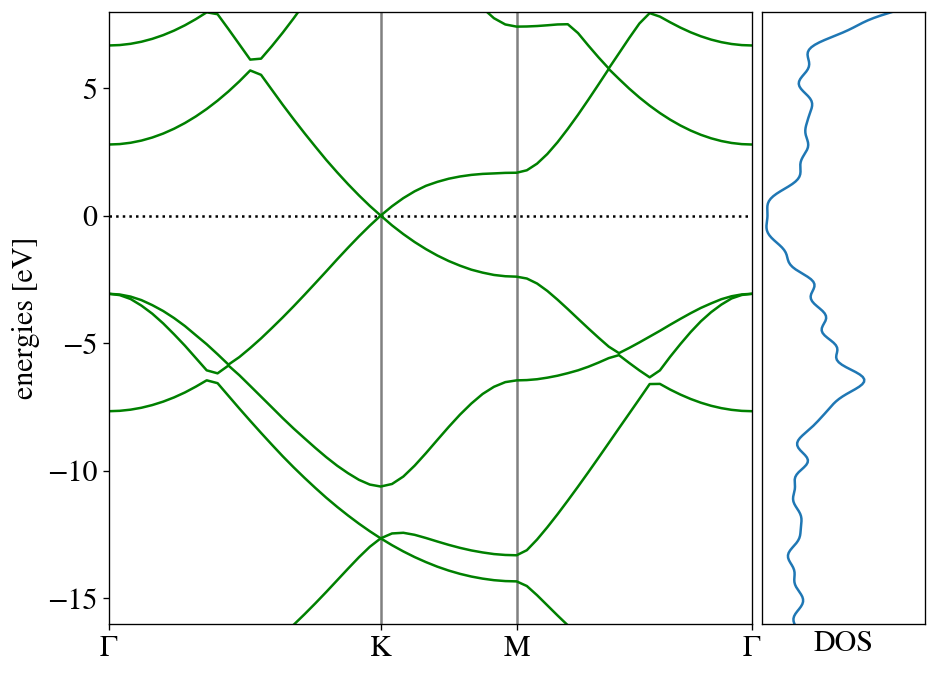

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([.12, .07, .67, .85])

emin = -16.0
emax = 8.0

bands = band.subtract_reference()
bands.plot(ax=ax, emin=emin, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.plot(dos, energies)

dosax.set_ylim(emin, emax)
dosax.set_xlim(0, None)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18);